##### <font color=#A0A0A0>
##### ════════════════════════════════════════════════════════
#####     🦾🤖 **CREATING A NEURAL NETWORK FROM SCRATCH**
##### ════════════════════════════════════════════════════════ </font>

#### 🎯 Project Objetive
Make a general neural network with some of the most important configurations. Test it with different data sets and track it's performance with differents hyperparameters

In [406]:
#import used pakages
import sys
import os
import random

if 'convolutional_net' in sys.modules:
    del sys.modules['convolutional_net']
    
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))
from keras.datasets import mnist
from keras.datasets import fashion_mnist
import numpy as np 
from sklearn.model_selection import train_test_split
from convolutional_net import Network,ConvLayer ,PoolingLayer, FlattenLayer, DenseLayer
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [407]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

In [408]:
valid_data = (x_val, y_val)

In [409]:
layers = [
    ConvLayer(kernel_size=2, filters=4, padding=0),
    PoolingLayer(2),
    FlattenLayer(),
    DenseLayer(128, activation='relu'),
    DenseLayer(10, activation='softmax')
]

# x_train = x_train[:10]
# y_train = y_train[:10]

model = Network(layers)
cost, accu = model.train(x_train, y_train, 10, 32, 0.1, validation_data=valid_data)

import pickle

with open('network.pkl', 'wb') as f:
    pickle.dump(model, f)

Epoch 1, Loss: 0.06182110474747251
Epoch 2, Loss: 0.047917851041619414
Epoch 3, Loss: 0.05188491384964182
Epoch 4, Loss: 0.04833164508809057
Epoch 5, Loss: 0.049249812307036754
Epoch 6, Loss: 0.048695121240437636
Epoch 7, Loss: 0.04541317205539737
Epoch 8, Loss: 0.042652630353714215
Epoch 9, Loss: 0.03847302212321594
Epoch 10, Loss: 0.035659080761822774


In [411]:
with open('network.pkl', 'rb') as f: 
    loaded_model = pickle.load(f)

In [412]:
test_data = (x_test, y_test)
cost, acc = loaded_model.evaluate(test_data)

In [414]:
acc

np.float64(0.9378)

In [418]:
0%2

0

C:\Users\PERSONAL\AppData\Local\Temp\ipykernel_19692\2348727906.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


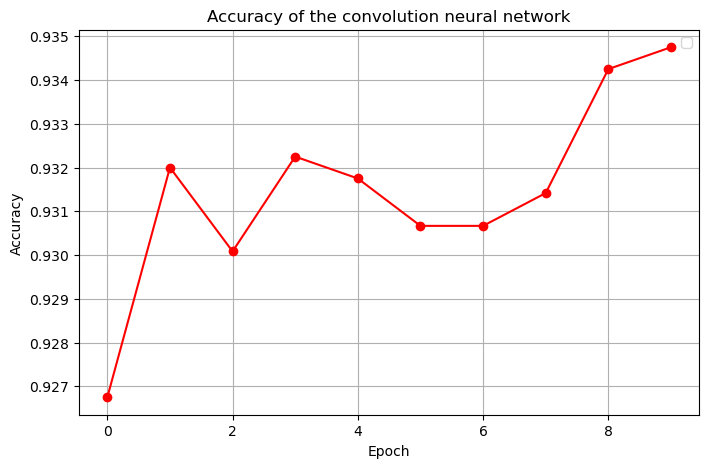

In [410]:
plt.figure(figsize=(8,5))
plt.plot(accu, marker='o', linestyle='-', color='r')
plt.title('Accuracy of the convolution neural network')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#### <font color=#A0A0A0> **🔘 Selection of hyperparameters**</font>

#### <font color=#A0A0A0> **🧐 Performance Summary**</font>

#### <font color=#A0A0A0> **🧐✅ Conclusions**</font>